In [1]:
import numpy as np
import pandas as pd

In [49]:
#Задание 1 numpy
def checker(N):
    row1 = np.r_[ (N//2)*[0,1], (N%2)*[0] ]       
    row2 = np.r_[ (N//2)*[1,0], (N%2)*[1] ]        
    return np.row_stack((N//2)*(row1, row2) + (N%2)*(row1,))

In [50]:
N = int(input())
print(checker(N))

4
[[ 0.  1.  0.  1.]
 [ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 1.  0.  1.  0.]]


In [51]:
#Задание 2 numpy
def sub_diagonal_matrix(N):
    return np.diag(np.arange(1, N, 1), k = -1)

In [52]:
N = int(input())
print(sub_diagonal_matrix(N))

4
[[0 0 0 0]
 [1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]]


In [53]:
#Зфдфние 3 numpy
def scale(A):
    Av_value = A.mean(axis = 0)
    Std_deviation = A.std(axis = 0)
    return (A-Av_value)/Std_deviation

In [54]:
A = np.random.randint(0, 10, size=(5,5))
print(A)
print(scale(A))

[[0 5 5 6 6]
 [7 4 4 6 4]
 [3 5 9 7 1]
 [1 0 6 3 1]
 [2 4 9 0 1]]
[[-1.07588766  0.75482941 -0.77702869  0.62092042  1.65118597]
 [ 1.82073295  0.21566555 -1.26267162  0.62092042  0.6799001 ]
 [ 0.16552118  0.75482941  1.16554303  1.00899568 -0.77702869]
 [-0.66208471 -1.94098992 -0.29138576 -0.54330537 -0.77702869]
 [-0.24828177  0.21566555  1.16554303 -1.70753116 -0.77702869]]


In [35]:
#Задание 4 numpy
cameras = np.load('cams.npy')

In [11]:
cameras

array([[  3.        ,  55.6885807 ,  37.58105588],
       [  6.        ,  55.69109852,  37.59703611],
       [  4.        ,  55.6867331 ,  37.59348567],
       ..., 
       [  1.        ,  55.79639291,  37.46103259],
       [  4.        ,  55.79553007,  37.45571975],
       [  6.        ,  55.79630207,  37.46395768]])

In [12]:
def distance(cameras):
    x = 55 + 45/60  + 6/360 
    y = 37 + 37/60 + 4/360
    km = 40075/360
    dist = (np.sqrt((x-cameras[:,1]) ** 2 + (y-cameras[:,2]) ** 2)) * km
    return dist
print('Расстояние от камер до Кремля', distance(cameras))

Расстояние от камер до Кремля [ 10.12967442   9.08164377   9.68243931 ...,  18.85463777  19.42103544
  18.53235746]


In [36]:
#Задание 5 numpy
%matplotlib inline
import matplotlib.pyplot as plt
def cam_heatmap(cameras, N):
    cameras = np.column_stack((cameras[:,0], cameras[:, 1]/np.max(cameras[:,1]), cameras[:, 2]/np.max(cameras[:,2])))
    matr = np.zeros((N, N))
    for row in cameras:
        x = int(round(row[1]*N - 1))
        y = int(round(row[2]*N - 1))
        matr[x][y] += row[0]
    return matr 

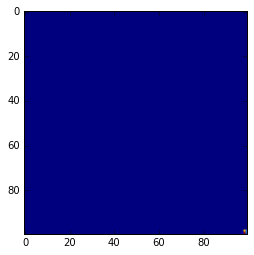

In [37]:
plt.clf()
plt.imshow(cam_heatmap(cameras, 100))
plt.show()

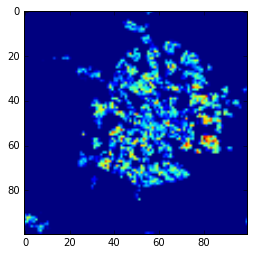

In [38]:
#если увеличить масштаб
cameras = np.column_stack((cameras[:,0], cameras[:, 1]-np.min(cameras[:,1]), cameras[:, 2]-np.min(cameras[:,2])))
%matplotlib inline
import matplotlib.pyplot as plt
def cam_heatmap(cameras, N):
    cameras = np.column_stack((cameras[:,0], cameras[:, 1]/np.max(cameras[:,1]), cameras[:, 2]/np.max(cameras[:,2])))
    matr = np.zeros((N, N))
    for row in cameras:
        x = int(round(row[1]*N - 1))
        y = int(round(row[2]*N - 1))
        matr[x][y] += row[0]
    return matr 
plt.clf()
plt.imshow(cam_heatmap(cameras, 100))
plt.show()

In [39]:
#Задание 1 pandas
data = pd.read_csv('data.csv')
print('Самая частая причина - ', data['CancellationCode'].value_counts().axes[0][0])

Самая частая причина -  B


In [41]:
#Задание 2 pandas
print('Среднее расстояние - ', np.mean(data['Distance']))

Среднее расстояние -  726.3870294253928


In [4]:
print('Максимальное расстояние -', np.max(data['Distance']))

Максимальное расстояние - 4962


In [5]:
print('Минимальное расстояние -', np.min(data['Distance']))

Минимальное расстояние - 11


In [13]:
#Задание 3 pandas
#Выглядит странно 
data[data['Distance'] == 11]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2547298,2008,5,15,4,2037,1800,2125,1900,OH,4988,...,10,7,0,NaN,0,145,0,0,0,0
4392215,2008,8,10,7,1315,1220,1415,1320,OH,5572,...,8,38,0,NaN,0,55,0,0,0,0


In [37]:
data.loc[data['Distance'] == 11,['Year','Month','DayofMonth','FlightNum']] #как вытащить значения?

,Year,Month,DayofMonth,FlightNum
2547298,2008,5,15,4988
4392215,2008,8,10,5572


In [38]:
data[data['FlightNum'] == 4988]['Distance'].unique()

array([834,  96,  11, 414, 223, 712, 321, 903], dtype=int64)

In [39]:
data[data['FlightNum'] == 5572]['Distance'].unique()

array([544, 329,  11, 363, 134, 669, 508], dtype=int64)

In [6]:
#Задание 4 pandas
Flight = data['Origin'].value_counts()
print('Больше всего вылетов было из', data['Origin'].value_counts().axes[0][0])

Больше всего вылетов было из ATL


In [8]:
airports = pd.read_csv('airports.csv')

In [34]:
airports.loc[airports['iata'] == 'ATL',['city']]

,city
880,Atlanta


In [38]:
#Задание 5 pandas
gr = data.groupby('Origin')
print('Среднее время полета:')
AvTime = gr['AirTime'].mean()
print(AvTime)

Среднее время полета:
Origin
ABE     89.057518
ABI     36.789977
ABQ     91.657166
ABY     35.379759
ACK     50.692124
ACT     29.875977
ACV     58.850658
ACY    108.848214
ADK    151.423913
ADQ     41.987934
AEX     68.543556
AGS     36.933814
AKN     37.321429
ALB    101.860527
ALO     36.373134
AMA     56.196001
ANC    156.163749
ASE     48.307996
ATL     93.320419
ATW     50.696326
AUS    101.266600
AVL     69.899021
AVP     94.665204
AZO     34.846602
BDL    118.701612
BET     57.597815
BFL     64.024511
BGM     66.582260
BGR     90.211095
BHM     82.290713
          ...    
SPS     29.490040
SRQ    103.083807
STL     99.294409
STT    168.681929
STX    168.101176
SUN     48.221851
SUX     44.918919
SWF    132.768826
SYR     84.524087
TEX     93.124183
TLH     59.293080
TOL     48.295047
TPA    117.917963
TRI     47.871046
TUL     80.876802
TUP     42.900000
TUS     92.801864
TVC     49.328770
TWF     41.316563
TXK     43.796312
TYR     30.372715
TYS     81.030894
VLD     45.158351

In [40]:
print('Наибольшее время полета у', AvTime.sort_values(ascending = False).axes[0][0], '=', np.max(AvTime))

Наибольшее время полета у SJU = 203.850842697
